This notebook determines what the best constant resolution is for all cities considering the tradeoff between the precision of the GP samples and the time taken for GP inference.

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rasterio as rio
from shapely.geometry import box

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [14]:
cities = [
    "Albuquerque",
    "Atlanta",
    "Baltimore",
    "Boston",
    "Boulder",
    "Chicago",
    "Detroit",
    "Durham",
    "Houston",
    "Kansas",
    "Las Vegas",
    "Los Angeles",
    "Miami",
    "Nashville",
    "New Orleans",
    "NYC",
    "Oklahoma",
    "San Francisco",
    "Seattle",
    "Washington DC"
]

ranges = []
resolution = 500
num_data_pts = []

for city in cities:
    gdf = gpd.read_file(f'../data/shapefiles/{city}/pm_trav.shp')
    gdf = gdf.to_crs(epsg=3857) # in meters
    bounds = gdf.total_bounds

    ominx, ominy, omaxx, omaxy = gdf.total_bounds
    y_range = omaxy - ominy
    x_range = omaxx - ominx
    ranges.append(y_range)
    ranges.append(x_range)
    num_data_pts_city = (y_range//resolution) * (x_range//resolution)
    num_data_pts.append(num_data_pts_city)
    print(f'City: {city}, Num Data Points: {num_data_pts_city}')
    print(f'City: {city}, Y Range: {y_range}, X Range: {x_range}')

City: Albuquerque, Num Data Points: 4224.0
City: Albuquerque, Y Range: 32197.483003999572, X Range: 33327.38575114496
City: Atlanta, Num Data Points: 2064.0
City: Atlanta, Y Range: 24230.246298229322, X Range: 21764.630242446437
City: Baltimore, Num Data Points: 20898.0
City: Baltimore, Y Range: 81252.05027559027, X Range: 64812.32478089817
City: Boston, Num Data Points: 1645.0
City: Boston, Y Range: 23886.361169124022, X Range: 17666.21765640285
City: Boulder, Num Data Points: 360.0
City: Boulder, Y Range: 10245.31130361557, X Range: 9466.423964576796
City: Chicago, Num Data Points: 8249.0
City: Chicago, Y Range: 56530.855897511356, X Range: 36787.937654936686
City: Detroit, Num Data Points: 4316.0
City: Detroit, Y Range: 26482.39394639246, X Range: 41870.97113704309
City: Durham, Num Data Points: 9300.0
City: Durham, Y Range: 46998.675513984635, X Range: 50274.66502951458
City: Houston, Num Data Points: 12000.0
City: Houston, Y Range: 40095.84469655296, X Range: 75009.29928632453
Cit

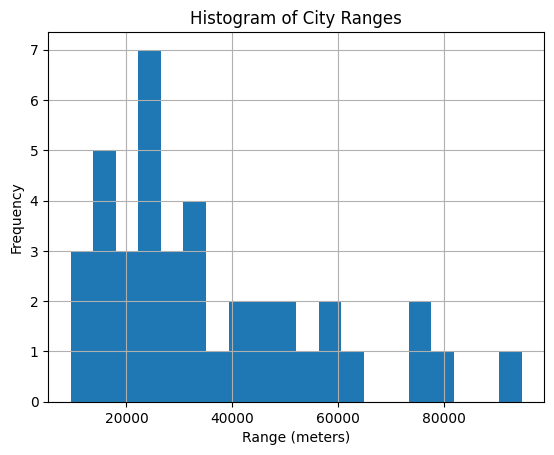

In [15]:
plt.hist(np.array(ranges), bins=20)
plt.title('Histogram of City Ranges')
plt.xlabel('Range (meters)')
plt.ylabel('Frequency')
plt.grid()

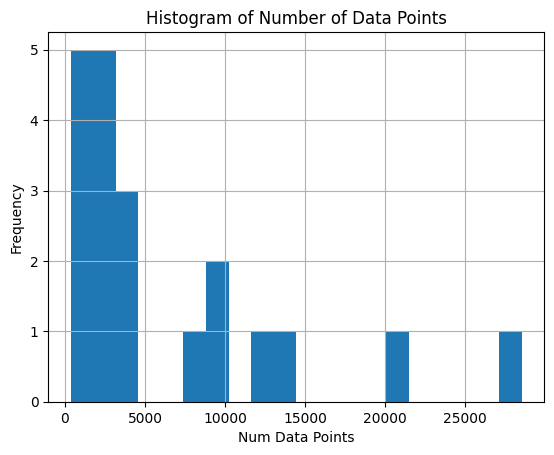

In [16]:
plt.hist(np.array(num_data_pts), bins=20)
plt.title('Histogram of Number of Data Points')
plt.xlabel('Num Data Points')
plt.ylabel('Frequency')
plt.grid()